In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


# Load the dataset
regional_data = pd.read_csv("C:/project/Freight_Analysis_Framework-/data/raw/FAF4_Regional.csv")

regional_data.head()


,fr_orig,dms_orig,dms_dest,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,tons_2012,...,tmiles_2015,tmiles_2020,tmiles_2025,tmiles_2030,tmiles_2035,tmiles_2040,tmiles_2045,curval_2013,curval_2014,curval_2015
0,NaN,11,11,NaN,NaN,1,NaN,1,1,17.3922,...,0.3817,0.4318,0.4791,0.5265,0.5854,0.6449,0.6656,36.7205,46.3411,42.7443
1,NaN,11,19,NaN,NaN,1,NaN,1,1,220.0650,...,25.7995,27.4014,28.5980,29.6591,30.9511,32.5587,33.8550,283.6623,333.8676,301.8007
2,NaN,11,129,NaN,NaN,1,NaN,1,1,1.0854,...,0.5211,0.5033,0.4917,0.4819,0.4688,0.4860,0.5272,1.3439,1.4783,1.3083
3,NaN,11,131,NaN,NaN,1,NaN,1,1,6.1655,...,1.4469,1.3902,1.4049,1.4619,1.5058,1.5015,1.6357,10.7475,10.9878,9.6642
4,NaN,11,139,NaN,NaN,1,NaN,1,1,2.7483,...,0.7550,0.6872,0.6569,0.6488,0.6353,0.6072,0.6476,4.5875,4.5780,3.9517


In [2]:
# Check for missing values
missing_values = regional_data.isnull().sum()

# Check the data types of the columns
data_types = regional_data.dtypes

# Check for duplicate rows
duplicates = regional_data.duplicated().sum()

# Display the results
print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)
print("\nNumber of Duplicates:", duplicates)

# Check the general summary of the dataset
print("\nGeneral Info:")
print(regional_data.info())


Missing Values:
 fr_orig        1037705
dms_orig             0
dms_dest             0
fr_dest        1053708
fr_inmode      1037705
dms_mode             0
fr_outmode     1053708
sctg2                0
trade_type           0
tons_2012            0
tons_2013            0
tons_2014            0
tons_2015            0
tons_2020            0
tons_2025            0
tons_2030            0
tons_2035            0
tons_2040            0
tons_2045            0
value_2012           0
value_2013           0
value_2014           0
value_2015           0
value_2020           0
value_2025           0
value_2030           0
value_2035           0
value_2040           0
value_2045           0
tmiles_2012          0
tmiles_2013          0
tmiles_2014          0
tmiles_2015          0
tmiles_2020          0
tmiles_2025          0
tmiles_2030          0
tmiles_2035          0
tmiles_2040          0
tmiles_2045          0
curval_2013          0
curval_2014          0
curval_2015          0
dtype: int64

Dat

Missing Values:

There are significant missing values in fr_orig, fr_dest, fr_inmode, and fr_outmode. These columns have missing values for more than 60% of the dataset.
Other columns like dms_orig, dms_dest, and others have no missing values.
Data Types:

Most of the columns are of type float64, which seems appropriate for numerical data like freight volume and value.
A few columns (like dms_orig, dms_dest, and trade_type) are of type int64, which is also correct for categorical data.
Duplicates:

No duplicates are present (as shown in the output).


In [3]:
# Handling missing values for categorical columns (fr_orig, fr_dest, fr_inmode, fr_outmode)
# Option 1: Fill missing values with the most frequent value (mode)
regional_data['fr_orig'] = regional_data['fr_orig'].fillna(regional_data['fr_orig'].mode()[0])
regional_data['fr_dest'] = regional_data['fr_dest'].fillna(regional_data['fr_dest'].mode()[0])
regional_data['fr_inmode'] = regional_data['fr_inmode'].fillna(regional_data['fr_inmode'].mode()[0])
regional_data['fr_outmode'] = regional_data['fr_outmode'].fillna(regional_data['fr_outmode'].mode()[0])

# Handling missing values for numerical columns (e.g., tons and value columns)
# Option 2: Fill missing values with the median
for column in regional_data.select_dtypes(include=['float64', 'int64']).columns:
    regional_data[column] = regional_data[column].fillna(regional_data[column].median())

# Check if there are still missing values
print("Missing values after handling:")
print(regional_data.isnull().sum())


Missing values after handling:
fr_orig        0
dms_orig       0
dms_dest       0
fr_dest        0
fr_inmode      0
dms_mode       0
fr_outmode     0
sctg2          0
trade_type     0
tons_2012      0
tons_2013      0
tons_2014      0
tons_2015      0
tons_2020      0
tons_2025      0
tons_2030      0
tons_2035      0
tons_2040      0
tons_2045      0
value_2012     0
value_2013     0
value_2014     0
value_2015     0
value_2020     0
value_2025     0
value_2030     0
value_2035     0
value_2040     0
value_2045     0
tmiles_2012    0
tmiles_2013    0
tmiles_2014    0
tmiles_2015    0
tmiles_2020    0
tmiles_2025    0
tmiles_2030    0
tmiles_2035    0
tmiles_2040    0
tmiles_2045    0
curval_2013    0
curval_2014    0
curval_2015    0
dtype: int64


In [4]:
# Check for duplicates again
duplicates_after_cleanup = regional_data.duplicated().sum()

# If duplicates exist, drop them
if duplicates_after_cleanup > 0:
    print(f"Removing {duplicates_after_cleanup} duplicate rows.")
    regional_data = regional_data.drop_duplicates()

# Confirm removal of duplicates
print(f"Number of duplicates after cleaning: {regional_data.duplicated().sum()}")


Number of duplicates after cleaning: 0


In [6]:
# List all the column names to find the correct ones
print(regional_data.columns)


Index(['fr_orig', 'dms_orig', 'dms_dest', 'fr_dest', 'fr_inmode', 'dms_mode',
       'fr_outmode', 'sctg2', 'trade_type', 'tons_2012', 'tons_2013',
       'tons_2014', 'tons_2015', 'tons_2020', 'tons_2025', 'tons_2030',
       'tons_2035', 'tons_2040', 'tons_2045', 'value_2012', 'value_2013',
       'value_2014', 'value_2015', 'value_2020', 'value_2025', 'value_2030',
       'value_2035', 'value_2040', 'value_2045', 'tmiles_2012', 'tmiles_2013',
       'tmiles_2014', 'tmiles_2015', 'tmiles_2020', 'tmiles_2025',
       'tmiles_2030', 'tmiles_2035', 'tmiles_2040', 'tmiles_2045',
       'curval_2013', 'curval_2014', 'curval_2015'],
      dtype='object')


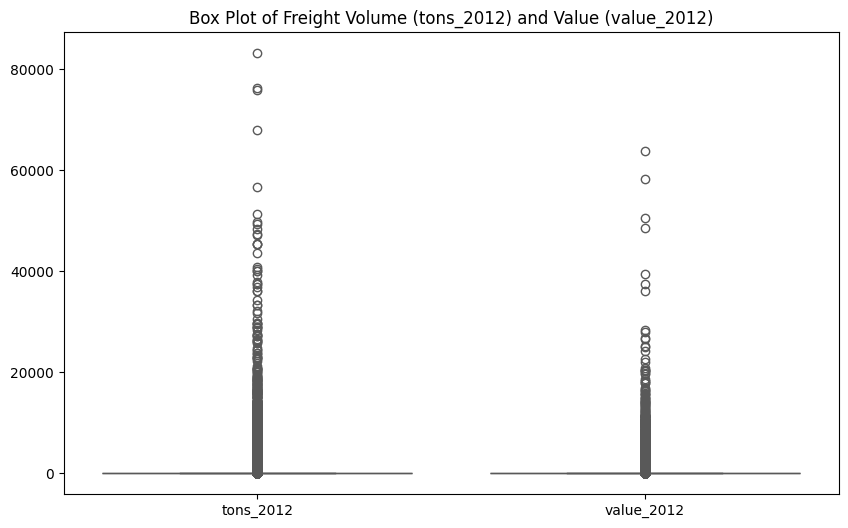

In [7]:
# Visualize outliers using box plots for tons_2012 and value_2012
plt.figure(figsize=(10, 6))
sns.boxplot(data=regional_data[['tons_2012', 'value_2012']], palette='Set2')
plt.title('Box Plot of Freight Volume (tons_2012) and Value (value_2012)')
plt.show()


General Observations:

Distribution: Both freight volume and value appear to have a right-skewed distribution. This is evident from the longer right whisker in both boxes and the presence of several outliers on the higher end of the scale.
Specific Observations:

Freight Volume (tons_2012):

Median: The median freight volume is around 20,000 tons.
Range: The range is quite wide, extending from close to 0 tons to around 80,000 tons.
Outliers: There are several data points above the upper whisker, indicating potential outliers with significantly higher freight volumes.
Freight Value (value_2012):

Median: The median freight value is around 20,000 units (assuming the units are consistent).
Range: Similar to volume, the range is broad, spanning from near 0 units to about 80,000 units.
Outliers: Like freight volume, there are outliers with significantly higher values.
Possible Interpretations:

Skewed Distribution: The right-skewed distribution suggests that a majority of freight shipments likely have relatively low volumes and values, while a smaller portion accounts for much larger volumes and values.
Outliers: The presence of outliers indicates that there might be some exceptional cases with unusually high freight volumes or values. These could be due to factors like large-scale projects, bulk shipments, or high-value goods.
Further Considerations:

Units: It's important to understand the units used for both volume and value to interpret the scale accurately.
Data Source: Knowing the source of the data (e.g., industry reports, company records) can provide additional context for the observations.
Relationship: While this box plot doesn't explicitly show the relationship between volume and value, it would be interesting to investigate if there's a correlation between the two variables.
Let me know if you would like a deeper analysis or have any specific questions about the box plot!









Outliers for Freight Volume (tons_2012) detected outside the range [-0.19370000000000004, 0.32310000000000005]
Number of outliers in Freight Volume: 274642
Outliers for Freight Value (value_2012) detected outside the range [-1.2834, 2.1470000000000002]
Number of outliers in Freight Value: 289803


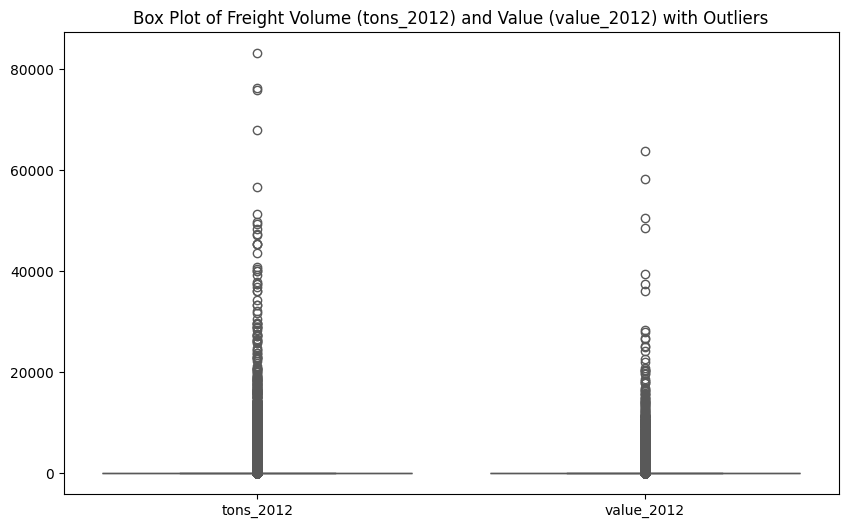

In [8]:
# Function to calculate IQR and identify outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for freight volume and value columns
outliers_volume, lower_volume, upper_volume = detect_outliers(regional_data, 'tons_2012')
outliers_value, lower_value, upper_value = detect_outliers(regional_data, 'value_2012')

# Display outliers information
print(f"Outliers for Freight Volume (tons_2012) detected outside the range [{lower_volume}, {upper_volume}]")
print(f"Number of outliers in Freight Volume: {outliers_volume.shape[0]}")
print(f"Outliers for Freight Value (value_2012) detected outside the range [{lower_value}, {upper_value}]")
print(f"Number of outliers in Freight Value: {outliers_value.shape[0]}")

# Visualize the outliers on a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=regional_data[['tons_2012', 'value_2012']], palette='Set2')
plt.title('Box Plot of Freight Volume (tons_2012) and Value (value_2012) with Outliers')
plt.show()


General Observations:

Distribution: Both freight volume and value appear to have a right-skewed distribution. This is evident from the longer right whisker in both boxes and the presence of several outliers on the higher end of the scale.
Specific Observations:

Freight Volume (tons_2012):

Median: The median freight volume is around 20,000 tons.
Range: The range is quite wide, extending from close to 0 tons to around 80,000 tons.
Outliers: There are several data points above the upper whisker, indicating potential outliers with significantly higher freight volumes.
Freight Value (value_2012):

Median: The median freight value is around 20,000 units (assuming the units are consistent).
Range: Similar to volume, the range is broad, spanning from near 0 units to about 80,000 units.
Outliers: Like freight volume, there are outliers with significantly higher values.
Possible Interpretations:

Skewed Distribution: The right-skewed distribution suggests that a majority of freight shipments likely have relatively low volumes and values, while a smaller portion accounts for much larger volumes and values.
Outliers: The presence of outliers indicates that there might be some exceptional cases with unusually high freight volumes or values. These could be due to factors like large-scale projects, bulk shipments, or high-value goods.
Further Considerations:

Units: It's important to understand the units used for both volume and value to interpret the scale accurately.
Data Source: Knowing the source of the data (e.g., industry reports, company records) can provide additional context for the observations.
Relationship: While this box plot doesn't explicitly show the relationship between volume and value, it would be interesting to investigate if there's a correlation between the two variables.


In [9]:
# Removing outliers for Freight Volume (tons_2012) and Freight Value (value_2012)
regional_data_cleaned = regional_data[
    (regional_data['tons_2012'] >= lower_volume) & (regional_data['tons_2012'] <= upper_volume) &
    (regional_data['value_2012'] >= lower_value) & (regional_data['value_2012'] <= upper_value)
]

# Confirming the number of rows after removing outliers
print(f"Original dataset size: {regional_data.shape[0]}")
print(f"Dataset size after removing outliers: {regional_data_cleaned.shape[0]}")


Original dataset size: 1660972
Dataset size after removing outliers: 1295419


In [10]:
# Capping outliers for Freight Volume and Value
regional_data_cleaned = regional_data.copy()

# Cap the outliers for Freight Volume (tons_2012) and Freight Value (value_2012)
regional_data_cleaned['tons_2012'] = np.clip(regional_data['tons_2012'], lower_volume, upper_volume)
regional_data_cleaned['value_2012'] = np.clip(regional_data['value_2012'], lower_value, upper_value)

# Confirm the changes
print(f"After capping, unique values for tons_2012: {regional_data_cleaned['tons_2012'].nunique()}")
print(f"After capping, unique values for value_2012: {regional_data_cleaned['value_2012'].nunique()}")


After capping, unique values for tons_2012: 95561
After capping, unique values for value_2012: 133132


In [14]:
import os

# Define the path for the processed data
processed_folder = "C:/project/Freight_Analysis_Framework-/data/processed/"
processed_data_path = os.path.join(processed_folder, "freight_analysis_cleaned.csv")

# Create the directory if it doesn't exist
if not os.path.exists(processed_folder):
    os.makedirs(processed_folder)

# Save the cleaned dataset
regional_data_cleaned.to_csv(processed_data_path, index=False)
print(f"Cleaned data saved successfully to {processed_data_path}")


Cleaned data saved successfully to C:/project/Freight_Analysis_Framework-/data/processed/freight_analysis_cleaned.csv
